# Explore specific chemical data

There are over 700 chemicals monitored by the TRI, but some might stand out from the others as posing a greater risk. According to the EPA's RSEI dashboard tool, chromium/chromium compounds and ethylene oxide have the two greatest shares of the country's total RSEI Score for 2018.

In this notebook, I am going to isolate facilities that emit these chemicals, and explore spatial patterns.

## Table of Contents

* [Isolate chromium/chromium compound emitting facilities](#chromium)
* [Isolate ethylene oxide emitting facilities](#ethylene)
* [Explore ethylene oxide data](#explore-ethylene)
* [Sterigenics plant in Willowbrook, Illinois](#sterigenics)

In [1]:
# import packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import mapping
from functools import reduce
import matplotlib.pyplot as plt
import os
import re
import numpy as np

import warnings
warnings.simplefilter(action='ignore')

# supress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Isolate chromium/chromium compound emitting facilities <a name="chromium"></a>

In [2]:
# first read csv in containing separate chemical records 
tri = pd.read_csv("../../all_tri_records.csv")
tri

,Unnamed: 0,YEAR,TRIFD,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,PARENT_CO_NAME,CHEMICAL,ON_SITE_RELEASE_TOTAL,UNIT_OF_MEASURE
0,0,1987,94304QLTYT3400H,QUALITY TECH,3400 HILLVIEW AVE,PALO ALTO,SANTA CLARA,CA,94304,37.40348,-122.14600,Computers and Electronic Products,QUALITY TECH,PHOSPHORIC ACID,250.00000,Pounds
1,1,1987,45377NLNDD480ND,DELPHI ENERGY & CHASSIS VANDALIA OPERATIONS,480 N DIXIE DR,VANDALIA,MONTGOMERY,OH,45377,39.90040,-84.19882,Transportation Equipment,DELPHI AUTOMOTIVE SYSTEMS LLC,"SULFURIC ACID (1994 AND AFTER ACID AEROSOLS"" O...",0.00000,Pounds
2,2,1987,27215PRKVN1821N,GLEN RAVEN TECHNICAL FABRICS LLC,1821 N PARK AVE,BURLINGTON,ALAMANCE,NC,27217,36.10932,-79.46178,Textiles,GLEN RAVEN TECHNICAL FABRICS LLC,AMMONIUM SULFATE (SOLUTION),0.00000,Pounds
3,3,1987,70058VNSCP1255P,GREIF USA (DBA GREIF HARVEY DCS HARVEY),1255 PETERS RD,HARVEY,JEFFERSON PARISH,LA,70058,29.88758,-90.07416,Fabricated Metals,GREIF USA,N-NITROSODI-N-PROPYLAMINE,2700.00000,Pounds
4,4,1987,55425VTCNC2401E,VTC INC RIVER RIDGE,2401 E 28TH ST,BLOOMINGTON,HENNEPIN,MN,55425,44.95979,-93.23143,Computers and Electronic Products,CONTROL DATA CORP,"SULFURIC ACID (1994 AND AFTER ACID AEROSOLS"" O...",0.00000,Pounds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717943,2739472,2018,42366PRMML5680O,HINES PRECISION INC,5680 OLD KY 54,PHILPOT,DAVIESS,KY,42366,37.73491,-87.00282,Fabricated Metals,NaN,CHROMIUM,0.00000,Pounds
2717944,2739473,2018,37066STVGL1499S,US TVA GALLATIN FOSSIL PLANT,1499 STEAM PLANT RD,GALLATIN,SUMNER,TN,37066,36.32460,-86.40260,Electric Utilities,US TENNESSEE VALLEY AUTHORITY,POLYCYCLIC AROMATIC COMPOUNDS,9.40000,Pounds
2717945,2739474,2018,6416WPNNYS861NE,PENNYS CONCRETE,8601 NE 38TH STREET,KANSAS CITY,CLAY,MO,64161,39.16218,-94.48128,Nonmetallic Mineral Product,PENNYS CONCRETE,NITRATE COMPOUNDS,0.00000,Pounds
2717946,2739475,2018,46368BTSTL6500S,NLMK INDIANA,6500 S BOUNDARY RD,PORTAGE,PORTER,IN,46368,41.62152,-87.16148,Primary Metals,NaN,COPPER,6.02000,Pounds


In [3]:
chromium = tri[(tri['YEAR'] == 2018) & (tri['CHEMICAL'].str.contains('CHROMIUM'))]
chromium

,Unnamed: 0,YEAR,TRIFD,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,PARENT_CO_NAME,CHEMICAL,ON_SITE_RELEASE_TOTAL,UNIT_OF_MEASURE
2639222,2659866,2018,2974WCMSTL6371C,CM STEEL INC,6371 CAMPBELL ROAD,YORK,YORK,SC,29745,35.03478,-81.12497,Fabricated Metals,NaN,CHROMIUM,15.07200,Pounds
2639235,2659879,2018,27893NCRMC2401S,LINAMAR FORGING CAROLINA,2401 STANTONSBURG RD,WILSON,WILSON,NC,27893,35.69570,-77.89097,Fabricated Metals,LINAMAR CORP,CHROMIUM,0.00000,Pounds
2639268,2659913,2018,74651SNRGNHWY15,OGE ENERGY CORP SOONER GENERATING STATION,HWY 15 N,RED ROCK,NOBLE,OK,74651,36.45350,-97.05267,Electric Utilities,OGE ENERGY CORP,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,199.00000,Pounds
2639277,2659922,2018,55719MNNST611WE,MN TWIST DRILL AQUISITION LLC,1 SW 7TH ST,CHISHOLM,ST LOUIS,MN,55719,47.48216,-92.87961,Machinery,NaN,CHROMIUM,0.00000,Pounds
2639284,2659929,2018,54971LLNCL69STA,ALLIANCE LAUNDRY SYSTEMS LLC STANTON PLANT,690 STANTON ST,RIPON,FOND DU LAC,WI,54971,43.85293,-88.82580,Machinery,ALLIANCE LAUNDRY SYSTEMS LLC,CHROMIUM,5.00000,Pounds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717871,2739398,2018,66106FRBNK3601F,PENTAIR - KANSAS CITY OPERATION,3601 FAIRBANKS AVE,KANSAS CITY,WYANDOTTE,KS,66106,39.08783,-94.67105,Electrical Equipment,PENTAIR INC,CHROMIUM,212.64000,Pounds
2717891,2739419,2018,75501LMXML300AL,TCI TEXARKANA INC,300 ALUMAX DR,TEXARKANA,BOWIE,TX,75501,33.45071,-94.13436,Primary Metals,TA CHEN INTERNATIONAL INC,CHROMIUM,1.40400,Pounds
2717897,2739425,2018,46580THYNC486W3,SYMMETRY MEDICAL WARSAW BULDING #1,486 W 350 N,WARSAW,KOSCIUSKO,IN,46582,41.28500,-85.85270,Miscellaneous Manufacturing,TECOMET INC,CHROMIUM,0.00000,Pounds
2717918,2739447,2018,7737WNVRMS196FM,NOV RMES TOMBALL,10906 FM 2920,TOMBALL,HARRIS,TX,77375,30.09958,-95.58480,Machinery,NATIONAL OILWELL VARCO LP,CHROMIUM,0.00000,Pounds


In [4]:
# check unique values in chemical column to ensure I selected the right records
chromium['CHEMICAL'].unique()

array(['CHROMIUM',
       'CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED IN THE TRANSVAAL REGION)'],
      dtype=object)

In [6]:
# since a single facility could have released multiple chemicals in the chromium category
# aggregate based on TRIFD, summing the total releases
chromium = chromium.fillna('').groupby('TRIFD').agg({'FACILITY_NAME':'first',
                             'STREET_ADDRESS':'first',
                             'CITY':'first',
                             'COUNTY':'first',
                             'ST':'first',
                             'ZIP':'first',
                             'LATITUDE':'first',
                             'LONGITUDE':'first',
                             'INDUSTRY_SECTOR':'first',
                             'PARENT_CO_NAME': 'first',
                             'ON_SITE_RELEASE_TOTAL':'sum',
                             'CHEMICAL':', '.join
                                               }).reset_index()

chromium

,TRIFD,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,PARENT_CO_NAME,ON_SITE_RELEASE_TOTAL,CHEMICAL
0,00612THRMKZENOG,THERMO KING PUERTO RICO MANUFACTURA INC,517 ZONA IND US TRIAL,ARECIBO,ARECIBO MUNICIPIO,PR,612,18.45815,-66.74646,Machinery,INGERSOLL-RAND CO,0.04900,CHROMIUM
1,00617PRCSNTMASD,ADM ALLIANCE NUTRITION OF PUERTO RICO LLC,TOMAS DAVILA ST EDIF 10 PALMAS ALTAS INDUSTRI...,BARCELONETA,BARCELONETA MUNICIPIO,PR,617,18.45276,-66.54038,Food,ARCHER DANIELS MIDLAND CO,0.00000,"CHROMIUM, CHROMIUM COMPOUNDS(EXCEPT CHROMITE O..."
2,00630WDTRT65INF,PUERTO RICO WOOD TREATING,AVE 65 DE INFANTERIA KM 7.0,CAROLINA,SAN JUAN MUNICIPIO,PR,985,18.38135,-66.03416,Wood Products,,0.00000,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...
3,00659CNTRLRD2KM,ADM ALLIANCE NUTRITION OF PR LLC,STATE RD NO. 2 KM 83.0 CARRIZALES WARD,HATILLO,HATILLO MUNICIPIO,PR,659,18.48514,-66.77732,Food,ARCHER DANIELS MIDLAND CO,0.00000,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...
4,00694HRVYHRD686,HUBBELL CARIBE LTD,RD 686 KM 17.3,VEGA BAJA,VEGA BAJA MUNICIPIO,PR,693,18.48647,-66.40520,Electrical Equipment,HUBBELL INC,0.00000,CHROMIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,99707FRTKN1FORA,FORT KNOX MINE,1 FORT KNOX RD,FAIRBANKS,FAIRBANKS NORTH STAR BOROUGH,AK,99712,64.99953,-147.35811,Metal Mining,KINROSS GOLD CORP,1600039.00000,CHROMIUM
3222,99737PGMNX38MIL,POGO MINE,38 MILES NE OF DELTA JUNCTION,DELTA JUNCTION,FAIRBANKS NORTH STAR BOROUGH,AK,99737,64.44972,-144.93962,Metal Mining,SUMITOMO METAL MINING AMERICA INC,39161.00000,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...
3223,99752RDDGP90MIL,RED DOG OPERATIONS,90 MILES N OF KOTZEBUE,KOTZEBUE,NORTHWEST ARCTIC BOROUGH,AK,99752,68.06151,-162.85549,Metal Mining,TECK AMERICAN INC,3458943.92000,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...
3224,99801CRLSK331CL,COEUR ALASKA INC KENSINGTON GOLD PROJECT,3031 CLINTON DR,JUNEAU,JUNEAU BOROUGH,AK,99801,58.86749,-135.10476,Metal Mining,COEUR MINING INC.,3502.00000,CHROMIUM


In [7]:
# cast lat/long columns to float
chromium['LATITUDE'] = chromium['LATITUDE'].astype(float)
chromium['LONGITUDE'] = chromium['LONGITUDE'].astype(float)

# create geodataframe using Latitude and Longitude columns
chromium_gdf = gpd.GeoDataFrame(chromium, geometry=gpd.points_from_xy(chromium.LONGITUDE, chromium.LATITUDE))

# define crs for geodataframe
chromium_gdf.crs = {'init' :'epsg:4326'}

chromium_gdf.head()

,TRIFD,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,PARENT_CO_NAME,ON_SITE_RELEASE_TOTAL,CHEMICAL,geometry
0,00612THRMKZENOG,THERMO KING PUERTO RICO MANUFACTURA INC,517 ZONA IND US TRIAL,ARECIBO,ARECIBO MUNICIPIO,PR,612,18.45815,-66.74646,Machinery,INGERSOLL-RAND CO,0.04900,CHROMIUM,POINT (-66.74646 18.45815)
1,00617PRCSNTMASD,ADM ALLIANCE NUTRITION OF PUERTO RICO LLC,TOMAS DAVILA ST EDIF 10 PALMAS ALTAS INDUSTRI...,BARCELONETA,BARCELONETA MUNICIPIO,PR,617,18.45276,-66.54038,Food,ARCHER DANIELS MIDLAND CO,0.00000,"CHROMIUM, CHROMIUM COMPOUNDS(EXCEPT CHROMITE O...",POINT (-66.54038 18.45276)
2,00630WDTRT65INF,PUERTO RICO WOOD TREATING,AVE 65 DE INFANTERIA KM 7.0,CAROLINA,SAN JUAN MUNICIPIO,PR,985,18.38135,-66.03416,Wood Products,,0.00000,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,POINT (-66.03416 18.38135)
3,00659CNTRLRD2KM,ADM ALLIANCE NUTRITION OF PR LLC,STATE RD NO. 2 KM 83.0 CARRIZALES WARD,HATILLO,HATILLO MUNICIPIO,PR,659,18.48514,-66.77732,Food,ARCHER DANIELS MIDLAND CO,0.00000,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,POINT (-66.77732 18.48514)
4,00694HRVYHRD686,HUBBELL CARIBE LTD,RD 686 KM 17.3,VEGA BAJA,VEGA BAJA MUNICIPIO,PR,693,18.48647,-66.40520,Electrical Equipment,HUBBELL INC,0.00000,CHROMIUM,POINT (-66.40520 18.48647)


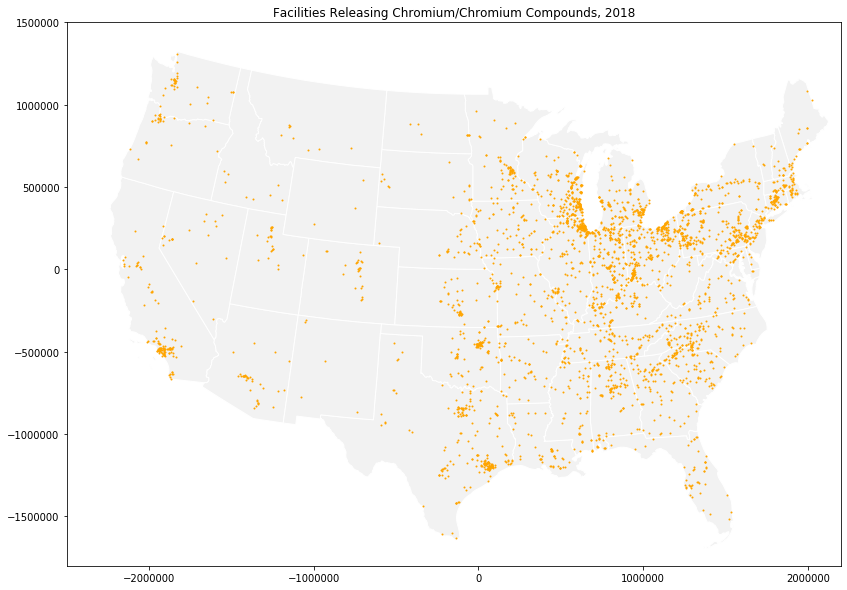

In [8]:
#plot these facilities to see spatial distribution
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

#project each layer to Albers Equal Conic for visualization
states_equal = states.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
gdf_equal = chromium_gdf.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

states_equal.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
gdf_equal.plot(ax=ax, color='orange', zorder=1, markersize=1);


ax.set(xlim=(-2500000,2200000), ylim=(-1800000,1500000), title='Facilities Releasing Chromium/Chromium Compounds, 2018');

print;

In [9]:
# export geodataframe to geojson
chromium_gdf.to_file("../data/map-data/chromium-facilities.geojson", driver='GeoJSON', encoding='utf-8')

## Isolate ethylene oxide emitting facilities <a name="ethylene"></a>

In [10]:
ethylene = tri[(tri['YEAR'] == 2018) & (tri['CHEMICAL'].str.contains('ETHYLENE OXIDE'))]
ethylene

,Unnamed: 0,YEAR,TRIFD,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,PARENT_CO_NAME,CHEMICAL,ON_SITE_RELEASE_TOTAL,UNIT_OF_MEASURE
2640402,2661062,2018,70669VSTCHOLDSP,SASOL CHEMICALS (USA) LLC-LAKE CHARLES CHEMICA...,2201 OLD SPANISH TRAIL,WESTLAKE,CALCASIEU PARISH,LA,70669,30.25880,-93.29370,Chemicals,SASOL (USA) CORP,ETHYLENE OXIDE,2237.00000,Pounds
2640502,2661163,2018,30209CRBRD8195N,BECTON DICKINSON & CO COVINGTON OPERATIONS,8195 INDUSTRIAL BLVD,COVINGTON,NEWTON,GA,30014,33.60820,-83.83960,Miscellaneous Manufacturing,BECTON DICKINSON & CO,ETHYLENE OXIDE,656.30000,Pounds
2641120,2661788,2018,16510MDCLM2205E,COSMED OF PENNSYLVANIA,2205 E 33RD ST,ERIE,ERIE,PA,16510,42.12398,-80.02186,Miscellaneous Manufacturing,COSMED GROUP INC,ETHYLENE OXIDE,293.00000,Pounds
2641363,2662031,2018,74063CHMLN9100W,BAKER PETROLITE LLC,9100 W 21ST ST,SAND SPRINGS,TULSA,OK,74063,36.12999,-96.09903,Chemicals,BAKER HUGHES A GE CO LLC,ETHYLENE OXIDE,9.00000,Pounds
2641415,2662084,2018,49504STRLS520WA,VIANT MEDICAL INC VIANT STERILIZATION SERVICES,520 WATSON ST SW,GRAND RAPIDS,KENT,MI,49504,42.96175,-85.68245,Miscellaneous Manufacturing,VIANT MEDICAL LLC,ETHYLENE OXIDE,378.39000,Pounds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716734,2738248,2018,30906KNDLL1816M,KENDALL PATIENT RECOVERY LLC,1430 MARVIN GRIFFIN RD,AUGUSTA,RICHMOND,GA,30906,33.39440,-81.98460,Miscellaneous Manufacturing,CARDINAL HEALTH INC,ETHYLENE OXIDE,259.00000,Pounds
2716745,2738259,2018,29605THXCHPERIM,ETHOX CHEMICALS LLC,1801 PERIMETER RD,GREENVILLE,GREENVILLE,SC,29605,34.73447,-82.37562,Chemicals,PIEDMONT CHEMICAL INDUSTRIES INC,ETHYLENE OXIDE,11.30000,Pounds
2716766,2738280,2018,62525STLYM2200E,TATE & LYLE DECATUR,2200 E ELDORADO ST,DECATUR,MACON,IL,62521,39.84995,-88.92346,Food,TATE & LYLE INGREDIENTS AMERICAS LLC,ETHYLENE OXIDE,239.00000,Pounds
2717038,2738555,2018,43920VNRLL1250S,HERITAGE THERMAL SERVICES,1250 ST GEORGE ST,EAST LIVERPOOL,COLUMBIANA,OH,43920,40.63162,-80.54632,Hazardous Waste,HERITAGE-WTI LLC,ETHYLENE OXIDE,0.00302,Pounds


In [11]:
# check unique values in chemical column to ensure I selected the right records
ethylene['CHEMICAL'].unique()

array(['ETHYLENE OXIDE'], dtype=object)

In [12]:
# cast lat/long columns to float
ethylene['LATITUDE'] = ethylene['LATITUDE'].astype(float)
ethylene['LONGITUDE'] = ethylene['LONGITUDE'].astype(float)

# create geodataframe using Latitude and Longitude columns
ethyl_gdf = gpd.GeoDataFrame(ethylene, geometry=gpd.points_from_xy(ethylene.LONGITUDE, ethylene.LATITUDE))

# define crs for geodataframe
ethyl_gdf.crs = {'init' :'epsg:4326'}

ethyl_gdf.head()

,Unnamed: 0,YEAR,TRIFD,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,PARENT_CO_NAME,CHEMICAL,ON_SITE_RELEASE_TOTAL,UNIT_OF_MEASURE,geometry
2640402,2661062,2018,70669VSTCHOLDSP,SASOL CHEMICALS (USA) LLC-LAKE CHARLES CHEMICA...,2201 OLD SPANISH TRAIL,WESTLAKE,CALCASIEU PARISH,LA,70669,30.25880,-93.29370,Chemicals,SASOL (USA) CORP,ETHYLENE OXIDE,2237.00000,Pounds,POINT (-93.29370 30.25880)
2640502,2661163,2018,30209CRBRD8195N,BECTON DICKINSON & CO COVINGTON OPERATIONS,8195 INDUSTRIAL BLVD,COVINGTON,NEWTON,GA,30014,33.60820,-83.83960,Miscellaneous Manufacturing,BECTON DICKINSON & CO,ETHYLENE OXIDE,656.30000,Pounds,POINT (-83.83960 33.60820)
2641120,2661788,2018,16510MDCLM2205E,COSMED OF PENNSYLVANIA,2205 E 33RD ST,ERIE,ERIE,PA,16510,42.12398,-80.02186,Miscellaneous Manufacturing,COSMED GROUP INC,ETHYLENE OXIDE,293.00000,Pounds,POINT (-80.02186 42.12398)
2641363,2662031,2018,74063CHMLN9100W,BAKER PETROLITE LLC,9100 W 21ST ST,SAND SPRINGS,TULSA,OK,74063,36.12999,-96.09903,Chemicals,BAKER HUGHES A GE CO LLC,ETHYLENE OXIDE,9.00000,Pounds,POINT (-96.09903 36.12999)
2641415,2662084,2018,49504STRLS520WA,VIANT MEDICAL INC VIANT STERILIZATION SERVICES,520 WATSON ST SW,GRAND RAPIDS,KENT,MI,49504,42.96175,-85.68245,Miscellaneous Manufacturing,VIANT MEDICAL LLC,ETHYLENE OXIDE,378.39000,Pounds,POINT (-85.68245 42.96175)


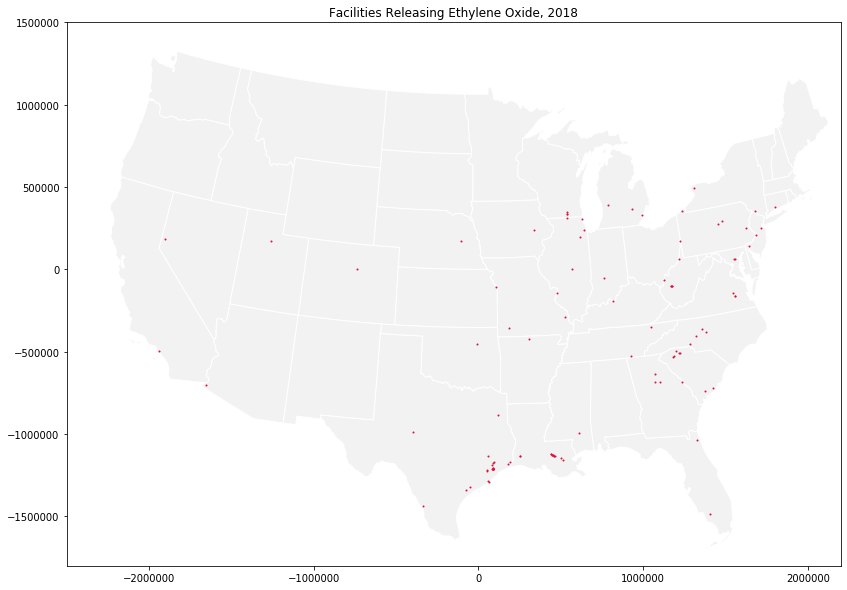

In [13]:
#plot these facilities to see spatial distribution
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

#project each layer to Albers Equal Conic for visualization
states_equal = states.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
gdf_equal = ethyl_gdf.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

states_equal.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
gdf_equal.plot(ax=ax, color='crimson', zorder=1, markersize=1);


ax.set(xlim=(-2500000,2200000), ylim=(-1800000,1500000), title='Facilities Releasing Ethylene Oxide, 2018');

print;

In [15]:
# export geodataframe to geojson
ethyl_gdf.to_file("../data/map-data/ethylene-facilities.geojson", driver='GeoJSON', encoding='utf-8')

There are far more chromium/chromium compound releasing facilities than there are releasing ethylene oxide. After bringing these into QGIS, and visualizing not only the locations of each facility, but also the release amounts, it became clear that ethylene oxide facilities are concentrated in Texas and Louisiana. Next I am going to explore that data further to get some concrete numbers to cite in my map story.

## Explore ethylene oxide data <a name="explore-ethylene"></a>

In [16]:
ethylene

,Unnamed: 0,YEAR,TRIFD,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,PARENT_CO_NAME,CHEMICAL,ON_SITE_RELEASE_TOTAL,UNIT_OF_MEASURE,geometry
2640402,2661062,2018,70669VSTCHOLDSP,SASOL CHEMICALS (USA) LLC-LAKE CHARLES CHEMICA...,2201 OLD SPANISH TRAIL,WESTLAKE,CALCASIEU PARISH,LA,70669,30.25880,-93.29370,Chemicals,SASOL (USA) CORP,ETHYLENE OXIDE,2237.00000,Pounds,POINT (-93.29370 30.25880)
2640502,2661163,2018,30209CRBRD8195N,BECTON DICKINSON & CO COVINGTON OPERATIONS,8195 INDUSTRIAL BLVD,COVINGTON,NEWTON,GA,30014,33.60820,-83.83960,Miscellaneous Manufacturing,BECTON DICKINSON & CO,ETHYLENE OXIDE,656.30000,Pounds,POINT (-83.83960 33.60820)
2641120,2661788,2018,16510MDCLM2205E,COSMED OF PENNSYLVANIA,2205 E 33RD ST,ERIE,ERIE,PA,16510,42.12398,-80.02186,Miscellaneous Manufacturing,COSMED GROUP INC,ETHYLENE OXIDE,293.00000,Pounds,POINT (-80.02186 42.12398)
2641363,2662031,2018,74063CHMLN9100W,BAKER PETROLITE LLC,9100 W 21ST ST,SAND SPRINGS,TULSA,OK,74063,36.12999,-96.09903,Chemicals,BAKER HUGHES A GE CO LLC,ETHYLENE OXIDE,9.00000,Pounds,POINT (-96.09903 36.12999)
2641415,2662084,2018,49504STRLS520WA,VIANT MEDICAL INC VIANT STERILIZATION SERVICES,520 WATSON ST SW,GRAND RAPIDS,KENT,MI,49504,42.96175,-85.68245,Miscellaneous Manufacturing,VIANT MEDICAL LLC,ETHYLENE OXIDE,378.39000,Pounds,POINT (-85.68245 42.96175)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716734,2738248,2018,30906KNDLL1816M,KENDALL PATIENT RECOVERY LLC,1430 MARVIN GRIFFIN RD,AUGUSTA,RICHMOND,GA,30906,33.39440,-81.98460,Miscellaneous Manufacturing,CARDINAL HEALTH INC,ETHYLENE OXIDE,259.00000,Pounds,POINT (-81.98460 33.39440)
2716745,2738259,2018,29605THXCHPERIM,ETHOX CHEMICALS LLC,1801 PERIMETER RD,GREENVILLE,GREENVILLE,SC,29605,34.73447,-82.37562,Chemicals,PIEDMONT CHEMICAL INDUSTRIES INC,ETHYLENE OXIDE,11.30000,Pounds,POINT (-82.37562 34.73447)
2716766,2738280,2018,62525STLYM2200E,TATE & LYLE DECATUR,2200 E ELDORADO ST,DECATUR,MACON,IL,62521,39.84995,-88.92346,Food,TATE & LYLE INGREDIENTS AMERICAS LLC,ETHYLENE OXIDE,239.00000,Pounds,POINT (-88.92346 39.84995)
2717038,2738555,2018,43920VNRLL1250S,HERITAGE THERMAL SERVICES,1250 ST GEORGE ST,EAST LIVERPOOL,COLUMBIANA,OH,43920,40.63162,-80.54632,Hazardous Waste,HERITAGE-WTI LLC,ETHYLENE OXIDE,0.00302,Pounds,POINT (-80.54632 40.63162)


In [17]:
# sort by on site release total to see some of the highest releases
ethylene.sort_values(by='ON_SITE_RELEASE_TOTAL', ascending=False)

,Unnamed: 0,YEAR,TRIFD,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,PARENT_CO_NAME,CHEMICAL,ON_SITE_RELEASE_TOTAL,UNIT_OF_MEASURE,geometry
2642053,2662728,2018,77979NNCRBPOBOX,UNION CARBIDE CORP SEADRIFT PLANT,7501 N HWY 185,SEADRIFT,CALHOUN,TX,77983,28.51064,-96.77153,Chemicals,THE DOW CHEMICAL CO,ETHYLENE OXIDE,57090.00000,Pounds,POINT (-96.77153 28.51064)
2680207,2701319,2018,77651TXCCHHWY36,HUNTSMAN PETROCHEMICAL LLC PORT NECHES FACILITY,6001 HWY 366,PORT NECHES,JEFFERSON,TX,77651,29.98996,-93.94659,Chemicals,HUNTSMAN INTERNATIONAL LLC,ETHYLENE OXIDE,42822.00000,Pounds,POINT (-93.94659 29.98996)
2659167,2680043,2018,78045MDWST121GE,MIDWEST STERILIZATION CORP,12010 GENERAL MILTON DR,LAREDO,WEBB,TX,78045,27.62028,-99.50306,Miscellaneous Manufacturing,MIDWEST STERILIZATION CORP,ETHYLENE OXIDE,15112.00000,Pounds,POINT (-99.50306 27.62028)
2688416,2709617,2018,70734BSFCRRIVER,BASF CORP,8404 HWY 75,GEISMAR,ASCENSION PARISH,LA,70734,30.19790,-91.00350,Chemicals,BASF CORP,ETHYLENE OXIDE,15100.00000,Pounds,POINT (-91.00350 30.19790)
2642089,2662764,2018,77507QSTRC5761U,EQUISTAR CHEMICALS BAYPORT CHEMICALS PLANT,5761 UNDERWOOD RD,PASADENA,HARRIS,TX,77507,29.62717,-95.08019,Chemicals,LYONDELLBASELL INDUSTRIES,ETHYLENE OXIDE,13436.00000,Pounds,POINT (-95.08019 29.62717)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703252,2724625,2018,61072BLTCR1165P,CHEMTOOL ROCKTON NORTH PLANT,1165 PRAIRIE HILL RD,ROCKTON,WINNEBAGO,IL,61072,42.46861,-89.06555,Chemicals,BERKSHIRE HATHAWAY INC,ETHYLENE OXIDE,0.00000,Pounds,POINT (-89.06555 42.46861)
2706977,2728392,2018,77507WLCHM11200,ATHLON SOLUTIONS LLC,11200 BAY AREA BLVD,PASADENA,HARRIS,TX,77507,29.61706,-95.04388,Chemicals,HALLIBURTON ENERGY SERVICES INC,ETHYLENE OXIDE,0.00000,Pounds,POINT (-95.04388 29.61706)
2707507,2728926,2018,0073WCSTMDCALLE,CUSTOMED,CALLE IGUALDAD # 7,FAJARDO,FAJARDO MUNICIPIO,PR,738,18.33224,-65.66452,Miscellaneous Manufacturing,NaN,ETHYLENE OXIDE,0.00000,Pounds,POINT (-65.66452 18.33224)
2699649,2720979,2018,00751STRTCRD701,STERI-TECH INC,RD 701 KM. 0.7 SALINAS INDUSTRIAL PARK,SALINAS,SALINAS MUNICIPIO,PR,751,17.97139,-66.30028,Miscellaneous Manufacturing,NaN,ETHYLENE OXIDE,0.00000,Pounds,POINT (-66.30028 17.97139)


In [18]:
# count how many facilities per state
ethylene['ST'].value_counts()

TX    25
LA    13
SC     7
WV     6
PA     5
IL     5
GA     4
NC     4
WI     3
MI     3
PR     3
MO     3
VA     3
FL     2
MD     2
NY     2
TN     2
NJ     1
CT     1
UT     1
OH     1
IN     1
AR     1
AZ     1
NE     1
NV     1
CO     1
KS     1
MS     1
IA     1
KY     1
CA     1
OK     1
DE     1
Name: ST, dtype: int64

With 25 facilities, Texas has 23% of all facilities, and Louisiana has 12% with 13 facilities. Now let's see how the release amounts compare.

In [19]:
# find total release amount for all facilities
sumTotal = ethylene['ON_SITE_RELEASE_TOTAL'].sum()
sumTotal

251588.60920000004

In [20]:
# now aggregate by state to find total amount released by state
stateTotals = ethylene.groupby('ST').agg({'ON_SITE_RELEASE_TOTAL':'sum'
                                               }).reset_index()

stateTotals.sort_values('ON_SITE_RELEASE_TOTAL', ascending=False)

,ST,ON_SITE_RELEASE_TOTAL
29,TX,158975.58398
13,LA,41064.30600
16,MO,8834.00000
33,WV,6941.77000
25,PA,5233.21020
0,AR,4910.62000
5,DE,4886.00000
31,VA,4639.18000
27,SC,3757.84000
3,CO,2467.00000


Texas releases 63.2% of all ethylene oxide, and Louisiana releases 16.32%. In contrast, Missouri comes in third with only 3.5% of all ethylene released.

Now I have some numbers to back up the visualization when exploring ethylene oxide in the map story.

## Sterigenics plant in Willowbrook, Illinois <a name="sterigenics"></a>

While researching ethylene oxide to provide some context in the map story, I came across a [news article](https://www.chicagotribune.com/news/environment/ct-sterigenics-ends-ethylene-oxide-operation-willowbrook-20190930-nkelcjshkbawdhxx2snjk3oaxe-story.html) about a medical sterilizer facility that recently closed down in a Chicago suburb. This facility had been releasing ethylene oxide for decades, and it was closed down due to public pressure after the EPA found that ethylene oxide was far more cancerous than they previously thought. According to these news articles, the Sterigenics plant only released around 4,600 pounds in 2017, which is far less than some of the highest emitters in Texas and Louisiana.

I want to find this plant in my data to illustrate in the map story.

In [21]:
# find facilities releasing ethylene oxide and with sterigenics in the name
df = tri[(tri['CHEMICAL'].str.contains('ETHYLENE OXIDE')) & (tri['FACILITY_NAME'].str.contains('STERIGENICS'))]
df

,Unnamed: 0,YEAR,TRIFD,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,PARENT_CO_NAME,CHEMICAL,ON_SITE_RELEASE_TOTAL,UNIT_OF_MEASURE
11830,11830,1987,30080GRFFT2973O,STERIGENICS US LLC-ATLANTA GA FACILITY,2971 OLYMPIC INDUSTRIAL DR SE,ATLANTA,COBB,GA,30339,33.83138,-84.46819,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,48652.00000,Pounds
36267,36267,1987,30080GRFFT2973O,STERIGENICS US LLC-ATLANTA GA FACILITY,2971 OLYMPIC INDUSTRIAL DR SE,ATLANTA,COBB,GA,30339,33.83138,-84.46819,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,20554.00000,Pounds
47404,47404,1987,60521GRFFT7775Q,STERIGENICS US LLC-WILLOWBROOK IL FACILITY,7775 S QUINCY ST,WILLOWBROOK,DUPAGE,IL,60527,41.74799,-87.93973,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,37367.00000,Pounds
49353,49353,1987,90058GRFFT4900G,STERIGENICS-LOS ANGELES FACILITY,4900 S GIFFORD AVE,VERNON,LOS ANGELES,CA,90058,33.99689,-118.19000,Other,STERIGENICS US LLC,ETHYLENE OXIDE,119076.00000,Pounds
52002,52002,1987,30080GRFFT2973O,STERIGENICS US LLC-ATLANTA GA FACILITY,2971 OLYMPIC INDUSTRIAL DR SE,ATLANTA,COBB,GA,30339,33.83138,-84.46819,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,20554.00000,Pounds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500786,2519863,2016,60521GRFFT7775Q,STERIGENICS US LLC-WILLOWBROOK IL FACILITY,7775 S QUINCY ST,WILLOWBROOK,DUPAGE,IL,60527,41.74799,-87.93973,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,4205.00000,Pounds
2511263,2530461,2016,30080GRFFT2973O,STERIGENICS US LLC-ATLANTA GA FACILITY,2971 OLYMPIC INDUSTRIAL DR SE,ATLANTA,COBB,GA,30339,33.83138,-84.46819,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,226.00000,Pounds
2528347,2547731,2016,28278GRFFT10801,STERIGENICS US LLC-CHARLOTTE NC FACILITY,10821 WITHERS COVE PARK DR,CHARLOTTE,MECKLENBURG,NC,28278,35.13673,-80.98302,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,863.00000,Pounds
2532510,2551948,2016,84116SRXMD5725W,STERIGENICS-SALT LAKE CITY FACILITY,5725 W HAROLD GATTY DR,SALT LAKE CITY,SALT LAKE,UT,84116,40.77778,-112.02500,Other,STERIGENICS US LLC,ETHYLENE OXIDE,2607.00000,Pounds


In [22]:
# there are mutiple sterigenics plants, now filter for the exact one
df = tri[(tri['CHEMICAL'].str.contains('ETHYLENE OXIDE')) & (tri['FACILITY_NAME'] == 'STERIGENICS US LLC-WILLOWBROOK IL FACILITY')]
df

,Unnamed: 0,YEAR,TRIFD,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,PARENT_CO_NAME,CHEMICAL,ON_SITE_RELEASE_TOTAL,UNIT_OF_MEASURE
47404,47404,1987,60521GRFFT7775Q,STERIGENICS US LLC-WILLOWBROOK IL FACILITY,7775 S QUINCY ST,WILLOWBROOK,DUPAGE,IL,60527,41.74799,-87.93973,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,37367.00000,Pounds
55381,55381,1987,60521GRFFT7775Q,STERIGENICS US LLC-WILLOWBROOK IL FACILITY,7775 S QUINCY ST,WILLOWBROOK,DUPAGE,IL,60527,41.74799,-87.93973,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,132599.00000,Pounds
102948,102948,1988,60521GRFFT7775Q,STERIGENICS US LLC-WILLOWBROOK IL FACILITY,7775 S QUINCY ST,WILLOWBROOK,DUPAGE,IL,60527,41.74799,-87.93973,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,97518.00000,Pounds
688316,688316,1995,60521GRFFT7775Q,STERIGENICS US LLC-WILLOWBROOK IL FACILITY,7775 S QUINCY ST,WILLOWBROOK,DUPAGE,IL,60527,41.74799,-87.93973,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,18373.00000,Pounds
787609,787609,1996,60521GRFFT7775Q,STERIGENICS US LLC-WILLOWBROOK IL FACILITY,7775 S QUINCY ST,WILLOWBROOK,DUPAGE,IL,60527,41.74799,-87.93973,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,22420.00000,Pounds
851770,851770,1997,60521GRFFT7775Q,STERIGENICS US LLC-WILLOWBROOK IL FACILITY,7775 S QUINCY ST,WILLOWBROOK,DUPAGE,IL,60527,41.74799,-87.93973,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,27020.00000,Pounds
977055,977056,1998,60521GRFFT7775Q,STERIGENICS US LLC-WILLOWBROOK IL FACILITY,7775 S QUINCY ST,WILLOWBROOK,DUPAGE,IL,60527,41.74799,-87.93973,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,32200.00000,Pounds
1061606,1061609,1999,60521GRFFT7775Q,STERIGENICS US LLC-WILLOWBROOK IL FACILITY,7775 S QUINCY ST,WILLOWBROOK,DUPAGE,IL,60527,41.74799,-87.93973,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,2640.00000,Pounds
1118128,1118595,2000,60521GRFFT7775Q,STERIGENICS US LLC-WILLOWBROOK IL FACILITY,7775 S QUINCY ST,WILLOWBROOK,DUPAGE,IL,60527,41.74799,-87.93973,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,7628.00000,Pounds
1201039,1202696,2001,60521GRFFT7775Q,STERIGENICS US LLC-WILLOWBROOK IL FACILITY,7775 S QUINCY ST,WILLOWBROOK,DUPAGE,IL,60527,41.74799,-87.93973,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,8113.00000,Pounds


The most recent data for this plant is from 2016, releasing 4,205 pounds that year.

In [23]:
# now filter for the 2016 record
# this is what I will show in the map story
df = tri[(tri['CHEMICAL'].str.contains('ETHYLENE OXIDE')) & (tri['FACILITY_NAME'] == 'STERIGENICS US LLC-WILLOWBROOK IL FACILITY') & (tri['YEAR'] == 2016)]
df

,Unnamed: 0,YEAR,TRIFD,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,PARENT_CO_NAME,CHEMICAL,ON_SITE_RELEASE_TOTAL,UNIT_OF_MEASURE
2500786,2519863,2016,60521GRFFT7775Q,STERIGENICS US LLC-WILLOWBROOK IL FACILITY,7775 S QUINCY ST,WILLOWBROOK,DUPAGE,IL,60527,41.74799,-87.93973,Other,STERIGENICS U.S. LLC,ETHYLENE OXIDE,4205.00000,Pounds


In [24]:
# append sterigenics plant to ethylene df
ethylene = ethylene.append(df, ignore_index=True)
ethylene

,Unnamed: 0,YEAR,TRIFD,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,PARENT_CO_NAME,CHEMICAL,ON_SITE_RELEASE_TOTAL,UNIT_OF_MEASURE,geometry
0,2661062,2018,70669VSTCHOLDSP,SASOL CHEMICALS (USA) LLC-LAKE CHARLES CHEMICA...,2201 OLD SPANISH TRAIL,WESTLAKE,CALCASIEU PARISH,LA,70669,30.25880,-93.29370,Chemicals,SASOL (USA) CORP,ETHYLENE OXIDE,2237.00000,Pounds,POINT (-93.2937 30.2588)
1,2661163,2018,30209CRBRD8195N,BECTON DICKINSON & CO COVINGTON OPERATIONS,8195 INDUSTRIAL BLVD,COVINGTON,NEWTON,GA,30014,33.60820,-83.83960,Miscellaneous Manufacturing,BECTON DICKINSON & CO,ETHYLENE OXIDE,656.30000,Pounds,POINT (-83.8396 33.6082)
2,2661788,2018,16510MDCLM2205E,COSMED OF PENNSYLVANIA,2205 E 33RD ST,ERIE,ERIE,PA,16510,42.12398,-80.02186,Miscellaneous Manufacturing,COSMED GROUP INC,ETHYLENE OXIDE,293.00000,Pounds,POINT (-80.02186 42.12398)
3,2662031,2018,74063CHMLN9100W,BAKER PETROLITE LLC,9100 W 21ST ST,SAND SPRINGS,TULSA,OK,74063,36.12999,-96.09903,Chemicals,BAKER HUGHES A GE CO LLC,ETHYLENE OXIDE,9.00000,Pounds,POINT (-96.09902700000001 36.129986)
4,2662084,2018,49504STRLS520WA,VIANT MEDICAL INC VIANT STERILIZATION SERVICES,520 WATSON ST SW,GRAND RAPIDS,KENT,MI,49504,42.96175,-85.68245,Miscellaneous Manufacturing,VIANT MEDICAL LLC,ETHYLENE OXIDE,378.39000,Pounds,POINT (-85.68245 42.96175)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2738259,2018,29605THXCHPERIM,ETHOX CHEMICALS LLC,1801 PERIMETER RD,GREENVILLE,GREENVILLE,SC,29605,34.73447,-82.37562,Chemicals,PIEDMONT CHEMICAL INDUSTRIES INC,ETHYLENE OXIDE,11.30000,Pounds,POINT (-82.37561700000001 34.734471)
106,2738280,2018,62525STLYM2200E,TATE & LYLE DECATUR,2200 E ELDORADO ST,DECATUR,MACON,IL,62521,39.84995,-88.92346,Food,TATE & LYLE INGREDIENTS AMERICAS LLC,ETHYLENE OXIDE,239.00000,Pounds,POINT (-88.923464 39.849947)
107,2738555,2018,43920VNRLL1250S,HERITAGE THERMAL SERVICES,1250 ST GEORGE ST,EAST LIVERPOOL,COLUMBIANA,OH,43920,40.63162,-80.54632,Hazardous Waste,HERITAGE-WTI LLC,ETHYLENE OXIDE,0.00302,Pounds,POINT (-80.54631999999999 40.631622)
108,2738915,2018,76905THCNN3348P,ETHICON INC,3348 PULLIAM ST,SAN ANGELO,TOM GREEN,TX,76905,31.47232,-100.38830,Miscellaneous Manufacturing,JOHNSON & JOHNSON,ETHYLENE OXIDE,1010.00000,Pounds,POINT (-100.3883 31.47232)


In [25]:
# cast lat/long columns to float
ethylene['LATITUDE'] = ethylene['LATITUDE'].astype(float)
ethylene['LONGITUDE'] = ethylene['LONGITUDE'].astype(float)

# create geodataframe using Latitude and Longitude columns
gdf = gpd.GeoDataFrame(ethylene, geometry=gpd.points_from_xy(ethylene.LONGITUDE, ethylene.LATITUDE))

# define crs for geodataframe
gdf.crs = {'init' :'epsg:4326'}

gdf

,Unnamed: 0,YEAR,TRIFD,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,PARENT_CO_NAME,CHEMICAL,ON_SITE_RELEASE_TOTAL,UNIT_OF_MEASURE,geometry
0,2661062,2018,70669VSTCHOLDSP,SASOL CHEMICALS (USA) LLC-LAKE CHARLES CHEMICA...,2201 OLD SPANISH TRAIL,WESTLAKE,CALCASIEU PARISH,LA,70669,30.25880,-93.29370,Chemicals,SASOL (USA) CORP,ETHYLENE OXIDE,2237.00000,Pounds,POINT (-93.29370 30.25880)
1,2661163,2018,30209CRBRD8195N,BECTON DICKINSON & CO COVINGTON OPERATIONS,8195 INDUSTRIAL BLVD,COVINGTON,NEWTON,GA,30014,33.60820,-83.83960,Miscellaneous Manufacturing,BECTON DICKINSON & CO,ETHYLENE OXIDE,656.30000,Pounds,POINT (-83.83960 33.60820)
2,2661788,2018,16510MDCLM2205E,COSMED OF PENNSYLVANIA,2205 E 33RD ST,ERIE,ERIE,PA,16510,42.12398,-80.02186,Miscellaneous Manufacturing,COSMED GROUP INC,ETHYLENE OXIDE,293.00000,Pounds,POINT (-80.02186 42.12398)
3,2662031,2018,74063CHMLN9100W,BAKER PETROLITE LLC,9100 W 21ST ST,SAND SPRINGS,TULSA,OK,74063,36.12999,-96.09903,Chemicals,BAKER HUGHES A GE CO LLC,ETHYLENE OXIDE,9.00000,Pounds,POINT (-96.09903 36.12999)
4,2662084,2018,49504STRLS520WA,VIANT MEDICAL INC VIANT STERILIZATION SERVICES,520 WATSON ST SW,GRAND RAPIDS,KENT,MI,49504,42.96175,-85.68245,Miscellaneous Manufacturing,VIANT MEDICAL LLC,ETHYLENE OXIDE,378.39000,Pounds,POINT (-85.68245 42.96175)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2738259,2018,29605THXCHPERIM,ETHOX CHEMICALS LLC,1801 PERIMETER RD,GREENVILLE,GREENVILLE,SC,29605,34.73447,-82.37562,Chemicals,PIEDMONT CHEMICAL INDUSTRIES INC,ETHYLENE OXIDE,11.30000,Pounds,POINT (-82.37562 34.73447)
106,2738280,2018,62525STLYM2200E,TATE & LYLE DECATUR,2200 E ELDORADO ST,DECATUR,MACON,IL,62521,39.84995,-88.92346,Food,TATE & LYLE INGREDIENTS AMERICAS LLC,ETHYLENE OXIDE,239.00000,Pounds,POINT (-88.92346 39.84995)
107,2738555,2018,43920VNRLL1250S,HERITAGE THERMAL SERVICES,1250 ST GEORGE ST,EAST LIVERPOOL,COLUMBIANA,OH,43920,40.63162,-80.54632,Hazardous Waste,HERITAGE-WTI LLC,ETHYLENE OXIDE,0.00302,Pounds,POINT (-80.54632 40.63162)
108,2738915,2018,76905THCNN3348P,ETHICON INC,3348 PULLIAM ST,SAN ANGELO,TOM GREEN,TX,76905,31.47232,-100.38830,Miscellaneous Manufacturing,JOHNSON & JOHNSON,ETHYLENE OXIDE,1010.00000,Pounds,POINT (-100.38830 31.47232)


In [26]:
# re-export to geojson now containing sterigenics plant
gdf.to_file("../data/map-data/ethylene-facilities.geojson", driver='GeoJSON', encoding='utf-8')